# Step 1
## What is the relationship between communication (words per minute + word variance) and performance (match outcome + kills per minute)

In [1]:
# based on this tutorial : http://seaborn.pydata.org/tutorial/relational.html#relational-tutorial

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# import the data
full_summary_stats_df = pd.read_csv(r"D:\Projects\UG-league-project\data\full-summary-stats.csv")

full_summary_stats_df.head()

,teamNumber,matchDuration,totalWords,meanWordsPerSecond,meanWordsPerMinute,varianceOfWords,rawMeanSentiment,meanSentimentWithoutZeros,matchOutcome,winLose,...,cohesion_50_percent,cohesion_75_percent,cohesion_max,satisfaction_mean,satisfaction_std,satisfaction_min,satisfaction_25_percent,satisfaction_50_percent,satisfaction_75_percent,satisfaction_max
0,1,1509.8,1825,1.209,72.54,80.372,0.111,0.203,0,lose,...,6.000000,6.250000,6.500000,6.166667,0.803638,5.25,5.875,6.50,6.625,6.75
1,2,1778.1,2271,1.277,76.62,68.808,0.095,0.169,1,win,...,6.000000,6.000000,6.833333,6.700000,0.325960,6.25,6.500,6.75,7.000,7.00
2,3,1599.8,2867,1.792,107.52,113.542,0.073,0.127,1,win,...,6.666667,6.750000,6.833333,6.916667,0.144338,6.75,6.875,7.00,7.000,7.00
3,4,1388.6,2702,1.946,116.76,198.309,0.090,0.135,1,win,...,5.833333,6.166667,6.166667,6.200000,0.647109,5.50,5.750,6.00,6.750,7.00
4,5,1175.9,2417,2.056,123.36,133.977,0.100,0.147,1,win,...,6.833333,7.000000,7.000000,6.800000,0.447214,6.00,7.000,7.00,7.000,7.00


*Visualise the relationship*


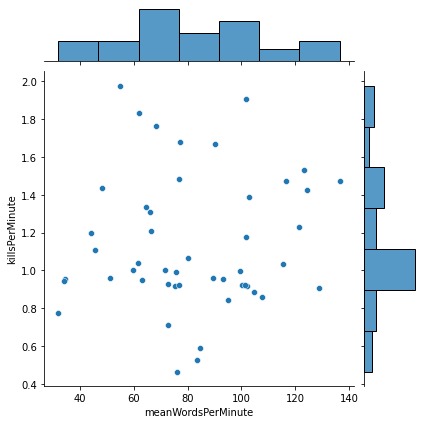

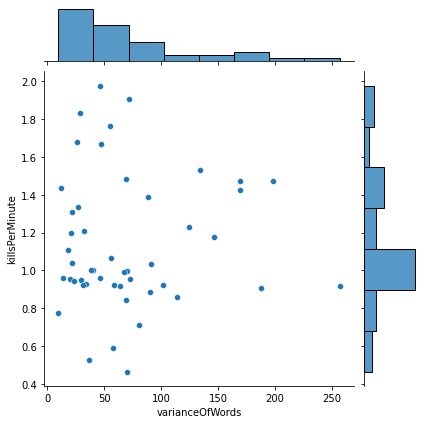

In [2]:
# relationship between mean wpm and kpm
ax1 = sns.jointplot(data = full_summary_stats_df, x = "meanWordsPerMinute", y = "killsPerMinute")
#ax1.set(xlabel = "mean Words per minute", ylabel = "mean Kills per minute")
ax1.savefig(r"../graphs/wpm-and-kpm.png")

# relationship between mean wpm and kpm
ax1 = sns.jointplot(data = full_summary_stats_df, x = "varianceOfWords", y = "killsPerMinute")
#ax1.set(xlabel = "mean Words per minute", ylabel = "mean Kills per minute")
ax1.savefig(r"../graphs/word-variance-and-kpm.png")



*check if the relationship is significant*

**calculate correlation between words per minute and kills per minute**

In [3]:
# retrieve column of interest
mean_cohesion_column = full_summary_stats_df.loc[:, "cohesion_mean"]
mean_wpm_column = full_summary_stats_df.loc[:, "meanWordsPerMinute"]
dist_communication_column = full_summary_stats_df.loc[:, "varianceOfWords"]
mean_kpm_column = full_summary_stats_df.loc[:, "killsPerMinute"]

# convert column into array
mean_cohesion_array = mean_cohesion_column.values
mean_wpm_array = mean_wpm_column.values
dist_communication_array = dist_communication_column.values
mean_kpm_array = mean_kpm_column.values

### Pearson's r
- assumptions: For the Pearson r correlation, both variables should be normally distributed (normally distributed variables have a bell-shaped curve).  Other assumptions include linearity and homoscedasticity.  Linearity assumes a straight line relationship between each of the two variables and homoscedasticity assumes that data is equally distributed about the regression line.
- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/

In [4]:
# calculate Pearsons correlation with p value ; for cohesion and wpm

calculate_pearsons_r = scipy.stats.pearsonr(mean_wpm_array, mean_kpm_array)

print("Pearson's r: ", calculate_pearsons_r[0])
print("p-value: ", calculate_pearsons_r[1])

if calculate_pearsons_r[1] < 0.05: 
    print("Significant correlation found")
    
else: 
    print("No significant correlation found")

Pearson's r:  0.07480927174852194
p-value:  0.613319465927714
No significant correlation found


**calculate correlation between variance of words and kills per minute**


Kendall's tau

    assumptions: monotonicity (the relationship between the two variables follows the general direction), fails the assumptions of pearsons
    https://www.statstest.com/kendalls-tau/



In [5]:
# calculate kendall's tau correlation; for cohesion and wpm
calculate_kendalls_tau = scipy.stats.kendalltau(dist_communication_array, mean_kpm_array)

print("kendall's tau: ", calculate_kendalls_tau[0])
print("p-value: ", calculate_kendalls_tau[1])

if calculate_kendalls_tau[1] < 0.05: 
    print("Significant correlation found")
    
else: 
    print("No significant correlation found")

kendall's tau:  -0.03636363993919811
p-value:  0.7155413796394245
No significant correlation found


**calculate logistic regression of words per minute and match outcome**

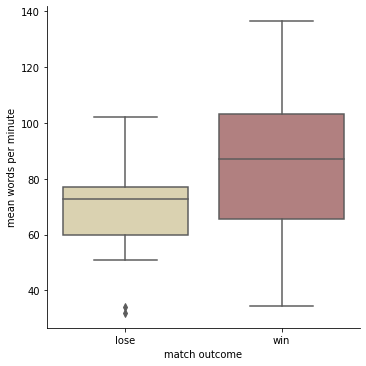

In [43]:
# relationship between mean wpm and match outcome
#ax2 = sns.catplot(data = full_summary_stats_df, x = "winLose", y = "meanWordsPerMinute", kind = "box", notch = True, color = "blue")
ax2 = sns.catplot(data = full_summary_stats_df, x = "winLose", y = "meanWordsPerMinute", kind = "box", palette = "pink_r")

ax2.set(xlabel = "match outcome", ylabel = "mean words per minute")

ax2.savefig(r"../graphs/wpm-and-match-outcome.png")

## find notches of 95% CI
## get p-value
## run t-test

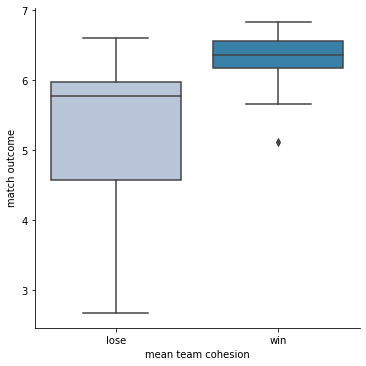

In [55]:
# relationship between mean wpm and match outcome
#ax2 = sns.catplot(data = full_summary_stats_df, x = "winLose", y = "cohesion_mean", kind = "box", notch = True)

ax2 = sns.catplot(data = full_summary_stats_df, x = "winLose", y = "cohesion_mean", kind = "box", palette = "PuBu")
ax2.set(xlabel = "mean team cohesion", ylabel = "match outcome")
ax2.savefig(r"../graphs/cohesion-and-match-outcome.png")

In [ ]:
e = 24.5 o = 36 : (-11.5)^2 = 132.25/24.5 == 5.3979
e = 24.5 0 = 13 (11.5^2) = 132.25/24.5 == 5.3979

chi square = 10.7958

# Running a logistic regression of comm freq. and cohesion on match outcome
https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

‘Iterations‘ refer to the number of times the model iterates over the data, trying to optimise the model. By default, the maximum number of iterations performed is 35, after which the optimisation fails.

In [8]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [9]:
# load the dataset
full_summary_stats_df = pd.read_csv(r"D:\Projects\UG-league-project\data\full-summary-stats.csv")

# define the dependent and independent variables
Xtrain = full_summary_stats_df[["meanWordsPerMinute", "cohesion_mean"]]
ytrain = full_summary_stats_df[["matchOutcome"]]

# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.525698
         Iterations 5


In [10]:
# get the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           matchOutcome   No. Observations:                   48
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Jul 2021   Pseudo R-squ.:                 0.06515
Time:                        22:34:54   Log-Likelihood:                -25.233
converged:                       True   LL-Null:                       -26.992
Covariance Type:            nonrobust   LLR p-value:                   0.06074
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
meanWordsPerMinute     0.0065      0.014      0.471      0.638      -0.021       0.034
cohesion_mean          0.1203      0.190      0.632      0.527      -0.253       0.493


In [11]:
# convert log odds to odds ratio for easier interpretation
log_reg_odds = pd.DataFrame(np.exp(log_reg.params), columns= ['OR'])
log_reg_odds['z-value']= log_reg.pvalues
log_reg_odds[['2.5%', '97.5%']] = np.exp(log_reg.conf_int())

log_reg_odds

,OR,z-value,2.5%,97.5%
meanWordsPerMinute,1.006548,0.637742,0.979572,1.034267
cohesion_mean,1.127809,0.527383,0.776683,1.637675
